In [1]:
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
np.random.seed(19785490)

In [3]:
npts = 200
ngridx = 100
ngridy = 200

In [4]:
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x ** 2 - y ** 2)

In [5]:
# create grid values first
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# linearly interpolate the data (x, y) on a grid defined by (xi, yi)
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
x_mesh, y_mesh = np.meshgrid(xi, yi)
zi = interpolator(x_mesh, y_mesh)

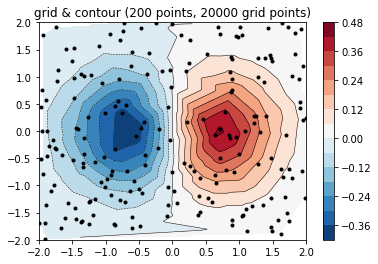

In [6]:
fig, ax = plt.subplots()

# -----------------------
# interpolation on a grid
# -----------------------
# a contour plot of irregularly spaced data coordinates
# via interpolation on a grid
ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors="k")
cntr = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr, ax=ax)
ax.plot(x, y, "ko", ms=3)
ax.set(xlim=(-2, 2), ylim=(-2, 2))
ax.set_title(f"grid & contour ({npts} points, {ngridx * ngridy} grid points)")

plt.show()

In [7]:
zi_sc = griddata((x, y), z, (xi[None, :], yi[:, None]), method="linear")

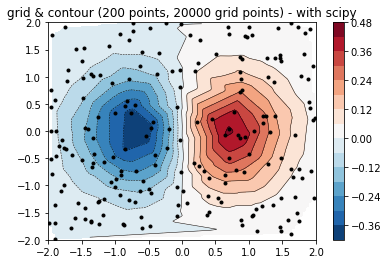

In [8]:
fig, ax = plt.subplots()

# -----------------------
# interpolation on a grid with scipy
# -----------------------
# a contour plot of irregularly spaced data coordinates
# via interpolation on a grid
ax.contour(xi, yi, zi_sc, levels=14, linewidths=0.5, colors="k")
cntr = ax.contourf(xi, yi, zi_sc, levels=14, cmap="RdBu_r")

fig.colorbar(cntr, ax=ax)
ax.plot(x, y, "ko", ms=3)
ax.set(xlim=(-2, 2), ylim=(-2, 2))
ax.set_title(f"grid & contour ({npts} points, {ngridx * ngridy} grid points) - with scipy")

plt.show()

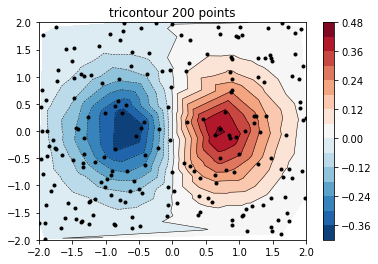

In [9]:
fig, ax = plt.subplots()

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour
ax.tricontour(x, y, z, levels=14, linewidths=0.5, colors="k")
cntr = ax.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr, ax=ax)
ax.plot(x, y, "ko", ms=3)
ax.set(xlim=(-2, 2), ylim=(-2, 2))
ax.set_title(f"tricontour {npts} points")

plt.show()